<a href="https://colab.research.google.com/github/TahminaAnondi/DeepLearningProject/blob/main/Copy_of_AirPollutionPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Libraries
import tensorflow as tf
import numpy as np #Linear Algebra
import matplotlib.pyplot as plt #Data visualization
import pandas as pd #data manipulation
from datetime import datetime

import warnings
warnings.filterwarnings('ignore') #Ignore warnings

In [ ]:
!pip install mplcursors

In [ ]:
# Insert data from csv file
pm_file_path = '/content/AirPollution.xlsx - Sheet4.csv'
df = pd.read_csv(pm_file_path)
# Combine the Year, Month, and Day columns into a new 'Date' column
df['Date'] = df.apply(lambda row: datetime(row['Year'], row['Month'], row['Day']), axis=1)
# Print the DataFrame to see the results
print(df)
print("\nShow first 5 elements: \n", df.head())

                         Perish  Year  Month  Day  pm2.5       Date
0     BATON ROUGE / CAPITOL 001  2011      1    1    6.0 2011-01-01
1     BATON ROUGE / CAPITOL 001  2011      1    2    5.7 2011-01-02
2     BATON ROUGE / CAPITOL 001  2011      1    3    4.8 2011-01-03
3     BATON ROUGE / CAPITOL 001  2011      1    4   14.3 2011-01-04
4     BATON ROUGE / CAPITOL 001  2011      1    5    9.6 2011-01-05
...                         ...   ...    ...  ...    ...        ...
7244                     KENNER  2018     12    4    2.7 2018-12-04
7245                     KENNER  2018     12   10    4.4 2018-12-10
7246                     KENNER  2018     12   16    3.7 2018-12-16
7247                     KENNER  2018     12   22    6.1 2018-12-22
7248                     KENNER  2018     12   28    4.2 2018-12-28

[7249 rows x 6 columns]

Show first 5 elements: 
                       Perish  Year  Month  Day  pm2.5       Date
0  BATON ROUGE / CAPITOL 001  2011      1    1    6.0 2011-01-01
1  

In [ ]:
# Filter the data for 'BATON ROUGE/CAPITOL 001' and sort it
pollution = df[df['Perish'] == 'PORT ALLEN']
pollution = pollution.drop(['Perish','Year', 'Month', 'Day'], axis=1)
pollution = pollution.sort_values(by='Date')

# Filter the dataset to include data from 2011 to 2022
start = pd.to_datetime('2011-01-01')
end = pd.to_datetime('2019-01-01')
pollution = pollution[(pollution['Date'] >= start) & (pollution['Date'] < end)]

# Print the DataFrame to see the results
print('SAMPLE OF TIME SERIES DATA:')
print(pollution.head())
print(pollution.count)

SAMPLE OF TIME SERIES DATA:
     pm2.5       Date
730    3.5 2011-01-01
731    3.2 2011-01-02
732    7.5 2011-01-03
733   16.9 2011-01-04
734    8.3 2011-01-05
<bound method DataFrame.count of       pm2.5       Date
730     3.5 2011-01-01
731     3.2 2011-01-02
732     7.5 2011-01-03
733    16.9 2011-01-04
734     8.3 2011-01-05
...     ...        ...
7184    5.2 2018-12-27
7185    5.2 2018-12-28
7186    4.6 2018-12-29
7187    5.7 2018-12-30
7188    6.3 2018-12-31

[2831 rows x 2 columns]>


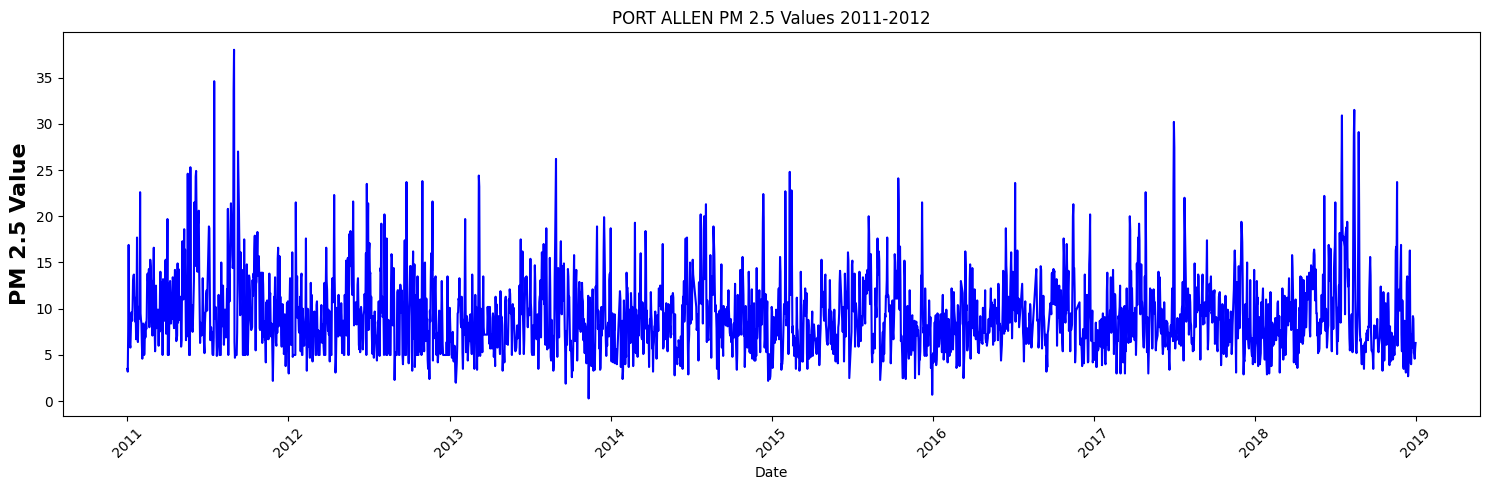

In [ ]:
import matplotlib.pyplot as plt

# Display a plot of the pm25 values since 2018
fig = plt.figure(figsize=(15, 5))
plt.plot(pollution['Date'], pollution['pm2.5'], color='blue')
plt.xlabel('Date')
plt.ylabel('PM 2.5 Value', fontsize=16, fontweight='bold', rotation=90)  # Adjust fontsize, fontweight, and rotation as needed
plt.title('PORT ALLEN PM 2.5 Values 2011-2012')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px

# Sample data
dates = pd.date_range('2019-01-01', periods=100)
# Create an interactive plot with hover information
# Create an interactive plot with hover information
fig = px.line(pollution, x='Date', y='pm2.5', title='PM 2.5 Values with Hover Information',
              labels={'Date': 'Date', 'pm2.5': 'PM 2.5 Value'})

# Add hover information
fig.update_traces(hovertemplate='<b>Date</b>: %{x}<br><b>PM 2.5 Value</b>: %{y}')

# Show the plot
fig.show()

In [ ]:
pollution.head()

,pm2.5,Date
730,3.5,2011-01-01
731,3.2,2011-01-02
732,7.5,2011-01-03
733,16.9,2011-01-04
734,8.3,2011-01-05


In [ ]:
pollution.describe()

,pm2.5
count,2831.000000
mean,9.253349
std,4.063517
min,0.300000
25%,6.500000
50%,8.500000
75%,11.250000
max,38.000000


In [ ]:
# Split the time series data into a train and test set
start_train_date = pd.to_datetime('2011-01-01')
end_train_date = pd.to_datetime('2016-12-31')
start_test_date = pd.to_datetime('2017-01-01')
end_test_date = pd.to_datetime('2018-12-31')

train = pollution.loc[(pollution['Date'] >= start_train_date) & (pollution['Date'] <= end_train_date)]
test = pollution.loc[(pollution['Date'] >= start_test_date) & (pollution['Date'] <= end_test_date)]

# Display first few rows of train and test sets
print("train",train.head())
print(test.head())

train      pm2.5       Date
730    3.5 2011-01-01
731    3.2 2011-01-02
732    7.5 2011-01-03
733   16.9 2011-01-04
734    8.3 2011-01-05
      pm2.5       Date
6128    4.5 2017-01-01
6129    5.0 2017-01-02
6130    4.5 2017-01-03
6131    5.9 2017-01-04
6132    8.5 2017-01-05


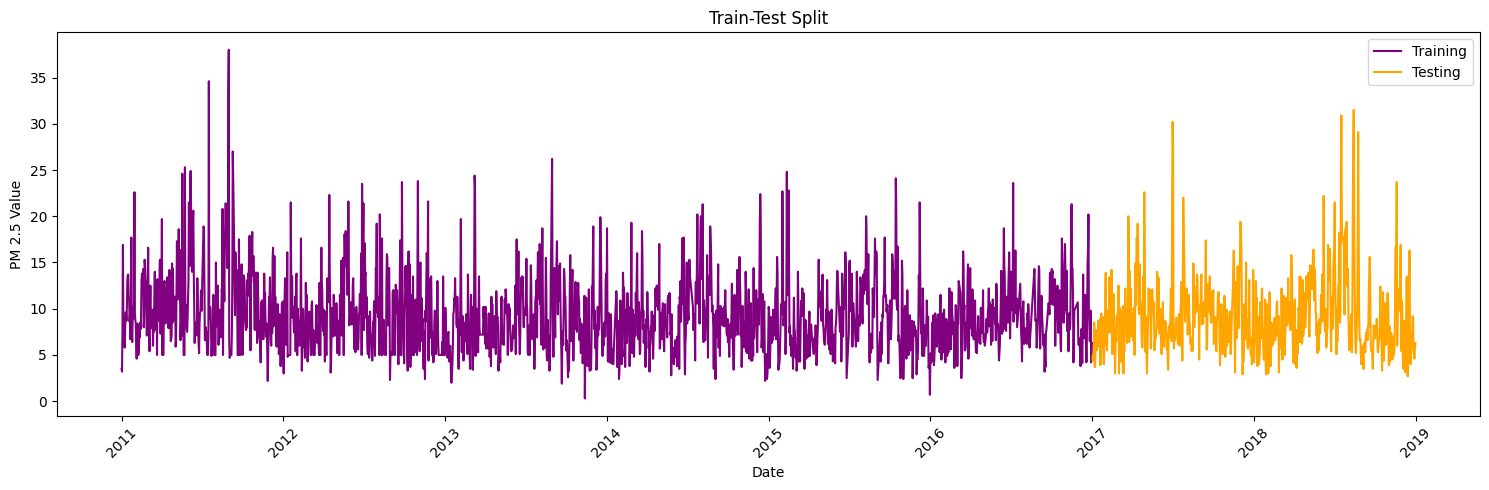

In [ ]:
# Displays a plot of the train/test split
fig = plt.figure(figsize=(15, 5))
plt.plot(train['Date'], train['pm2.5'], color='purple', label='Training')
plt.plot(test['Date'], test['pm2.5'], color='orange', label='Testing')
plt.xlabel('Date')
plt.ylabel('PM 2.5 Value')
plt.title('Train-Test Split')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


In [ ]:
from tensorflow.keras.callbacks import Callback
# We will create CustomCallback which will stop the model from training once the model reaches under 10 mean absolute error on the training set.
class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('mae') < 10.0:
            print("MAE under 10.0... Stopping training")
            self.model.stop_training = True

my_callback = CustomCallback()

In [ ]:
# Predefined Callback - LearningRateScheduler
from tensorflow.keras.callbacks import LearningRateScheduler

#creates a function that updates the learning rate based on the epoch number
def scheduler(epoch, lr):
    if epoch < 2:
        return 0.01
    else:
        return lr * 0.99

lr_scheduler = LearningRateScheduler(scheduler)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Lambda, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber
from sklearn.preprocessing import StandardScaler

# Assuming 'train' is your pandas DataFrame with 'pm2.5' as float32 and 'Date' columns
print("Shape of train DataFrame:", train.shape)
print(train.head())

# Scale the 'pm2.5' values using StandardScaler
scaler = StandardScaler()
train['pm2.5'] = scaler.fit_transform(train[['pm2.5']])
#Creates a windowed dataset from the time series data


# Define window size and create a windowed dataset
WINDOW = 14  # the window value... 14 days
train_values = train['pm2.5'].values.astype('float32')

# Function to create windowed dataset
def create_windowed_dataset(values, window_size):
    dataset = tf.data.Dataset.from_tensor_slices(values)
    dataset = dataset.window(window_size+1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda x: x.batch(window_size+1))
    dataset = dataset.map(lambda x: (x[:-1], x[-1]))
    dataset = dataset.shuffle(1000)
    dataset = dataset.batch(32).prefetch(1)
    return dataset

# Create the windowed dataset
train_data = create_windowed_dataset(train_values, WINDOW)

# LSTM model using Bidirectional layers
lstm_model = Sequential([
    Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[WINDOW]),
    Bidirectional(LSTM(128, return_sequences=True)),
    Bidirectional(LSTM(128)),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(1)
])

# Compile the model with Huber loss and Adam optimizer
lstm_model.compile(loss=Huber(), optimizer=Adam(), metrics=['mae'])
lstm_model.summary()
# Train the LSTM model
lstm_history = lstm_model.fit(
    train_data,  # Assuming train_data is properly prepared and has the correct shape
    epochs=100,
    callbacks=[lr_scheduler, my_callback],
    verbose=0
)


Shape of train DataFrame: (2110, 2)
     pm2.5       Date
730    3.5 2011-01-01
731    3.2 2011-01-02
732    7.5 2011-01-03
733   16.9 2011-01-04
734    8.3 2011-01-05
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_3 (Lambda)           (None, 14, 1)             0         
                                                                 
 bidirectional_6 (Bidirecti  (None, 14, 256)           133120    
 onal)                                                           
                                                                 
 bidirectional_7 (Bidirecti  (None, 256)               394240    
 onal)                                                           
                                                                 
 dense_6 (Dense)             (None, 256)               65792     
                                                                 
 dropout_3 (Dropou

In [ ]:

import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Train the LSTM model
lstm_history = lstm_model.fit(
    train_data,  # Assuming train_data is properly prepared and has the correct shape
    epochs=100,
    callbacks=[lr_scheduler, my_callback],
    verbose=0
)


MAE under 10.0... Stopping training


In [ ]:

# Reset Matplotlib configuration
plt.rcParams.update(plt.rcParamsDefault)

# Train the LSTM model and capture the training history
lstm_history = lstm_model.fit(
    train_data,  # Assuming train_data is properly prepared and has the correct shape
    epochs=100,
    callbacks=[lr_scheduler, my_callback],
    verbose=0
)

# Print the final loss and MAE
print("\t\t\t\t\tFINAL LOSS: {} | FINAL MAE: {}".format(
    round(lstm_history.history['loss'][-1], 2),
    round(lstm_history.history['mae'][-1], 2)
))

# Check the training history data
print("Training History:")
print(lstm_history.history)


MAE under 10.0... Stopping training
					FINAL LOSS: 0.31 | FINAL MAE: 0.65
Training History:
{'loss': [0.3107527494430542], 'mae': [0.646541178226471], 'lr': [0.01]}
